# Tugas

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur CountVectorizer dengan mengaktifkan stop_words
    3. Evaluasi hasilnya

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

# Jawaban Praktikum

## Jawaban Soal 1

Lakukan import library dan load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('docs/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Kemudian hitung jumlah kemunculan setiap nilai (unique value) dalam kolom 'label' pada DataFrame 'df'. Hasilnya adalah serangkaian nilai yang unik beserta jumlah kemunculan masing-masing nilai tersebut dalam kolom 'label'.

In [3]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

Buat sebuah heatmap korelasi dari DataFrame 'df' menggunakan pustaka seaborn (sns) dan matplotlib (plt)

C:\Users\adien\AppData\Local\Temp\ipykernel_19512\1585271923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


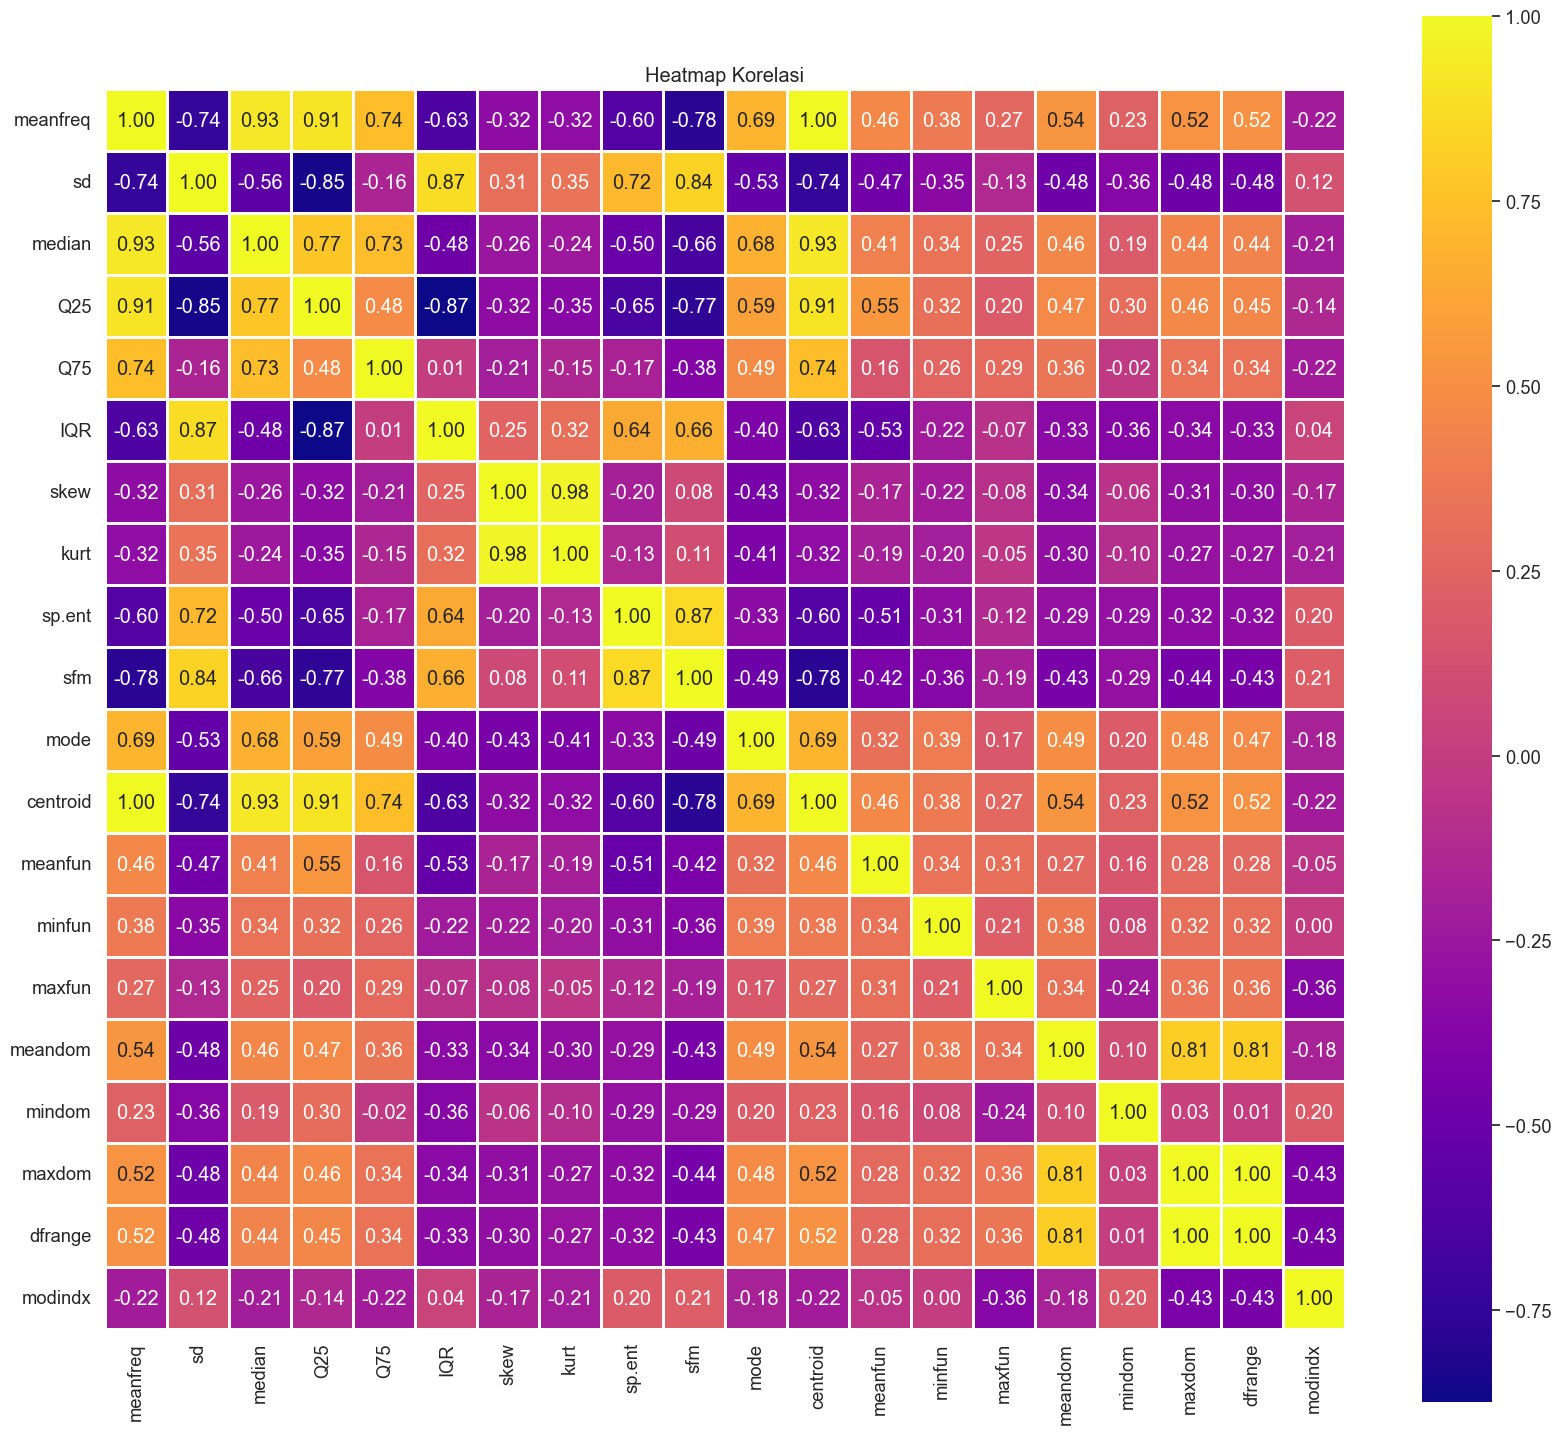

In [4]:
plt.figure(figsize=(20, 18))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            cmap='plasma',
            linewidths=1, 
            fmt=".2f",
            annot=True,
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()

Identifikasi Variabel Independen dan Dependen

In [5]:
X = df.iloc[:,:20]
y = df.label

Split Data Training dan Testing menjadi 70:30

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
x1 = type(X.to_numpy())
x1

numpy.ndarray

Lakukan Import Model SVM dan latih Model dengan Data Training dan Prediksi dengan Data Testing serta cek Akurasi Model SVM Terhadap Label Sebenarnya dan Hasil Prediksi

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(kernel='linear', C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Cetak hasil akurasi
print(f'Skor Akurasi : {int(accuracy * 100)}%')

Skor Akurasi : 92%


## Jawaban Soal 2

1. Menggunakan data spam.csv

In [9]:
df = pd.read_csv('docs/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- Drop 3 kolom terakhir dengan fungsi iloc kemudian cetak data

In [10]:
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Ubah nama kolom v1 dan v2 kemudian lakukan cek data

In [11]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)

df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Cek jumlah data perkelas, kelengkapan data dan cek statistik deskriptif

In [12]:
print(df['Labels'].value_counts())
print('\n')

print(df.info())
print('\n')

print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


- Encode Label

In [13]:
new_labels = {
    'spam': 1,
    'ham': 0
}

df['Labels'] = df['Labels'].map(new_labels)

df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Memisahkan Fitur dengan Label

In [14]:
X = df['SMS'].values
y = df['Labels'].values

2. Fitur CountVectorizer dengan mengaktifkan stop_words

Split data training dan testing menjadi 70:30 serta lakukan Inisiasi CountVectorizer kemudian Fitting dan transform X_train dengan CountVectorizer kemudian Transform X_test

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

3. Evaluasi Hasil

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


## Jawaban Soal 3

1. Menggunakan data spam.csv

In [18]:
X = df['SMS'].values
y = df['Labels'].values

2. Fitur TF-IDF dengan mengaktifkan stop_words

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.410256%
Hasil akurasi data test: 96.351675%


4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Berdasarkan hasil evaluasi akurasi pada model klasifikasi Multinominal Naive Bayes yang menggunakan 2 jenis fitur yaitu CV & TF-IDF, kesimpulannya yaitu :

- Akurasi data training dan testing menggunakan CV lebih besar pada fitur CV (CountVectorized) lebih besar presentasinya.
- Hasil akurasi yang tinggi pada fitur CV menandakan fitur tersebut sangat baik dalam memprediksi apakah sebuah pesan adalah spam atau bukan.